In [3]:
import pandas as pd

## 1. Table events.csv

In [4]:
event_df=pd.read_csv('../dataset/events.csv')
event_df.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [5]:
event_df['event'].value_counts()


event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64

In [6]:
event_df['transactionid'].shape

(2756101,)

In [7]:
event_df[event_df['transactionid'].isna()]

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN
...,...,...,...,...,...
2756096,1438398785939,591435,view,261427,NaN
2756097,1438399813142,762376,view,115946,NaN
2756098,1438397820527,1251746,view,78144,NaN
2756099,1438398530703,1184451,view,283392,NaN


### Event 'addtocart' and 'view' dont have 'transactionid'

In [8]:
view_no_trans_df = event_df[(event_df['event'] == 'view') & (event_df['transactionid'].isna())]
atc_no_trans_df= event_df[(event_df['event'] == 'addtocart') & (event_df['transactionid'].isna())]
atc_no_trans_df

,timestamp,visitorid,event,itemid,transactionid
17,1433223236124,287857,addtocart,5206,NaN
19,1433221078505,158090,addtocart,10572,NaN
63,1433223543021,1193904,addtocart,255275,NaN
112,1433221941632,599528,addtocart,356475,NaN
179,1433220880956,105775,addtocart,312728,NaN
...,...,...,...,...,...
2755956,1438400400805,831605,addtocart,57810,NaN
2756056,1438398156086,10670,addtocart,419736,NaN
2756074,1438400994744,144106,addtocart,141241,NaN
2756078,1438399807937,804736,addtocart,447661,NaN


In [9]:
event_df[event_df['transactionid'].notna()]

,timestamp,visitorid,event,itemid,transactionid
130,1433222276276,599528,transaction,356475,4000.0
304,1433193500981,121688,transaction,15335,11117.0
418,1433193915008,552148,transaction,81345,5444.0
814,1433176736375,102019,transaction,150318,13556.0
843,1433174518180,189384,transaction,310791,7244.0
...,...,...,...,...,...
2755294,1438377176570,1050575,transaction,31640,8354.0
2755349,1438379878779,861299,transaction,456602,3643.0
2755508,1438357730123,855941,transaction,235771,4385.0
2755603,1438355560300,548772,transaction,29167,13872.0


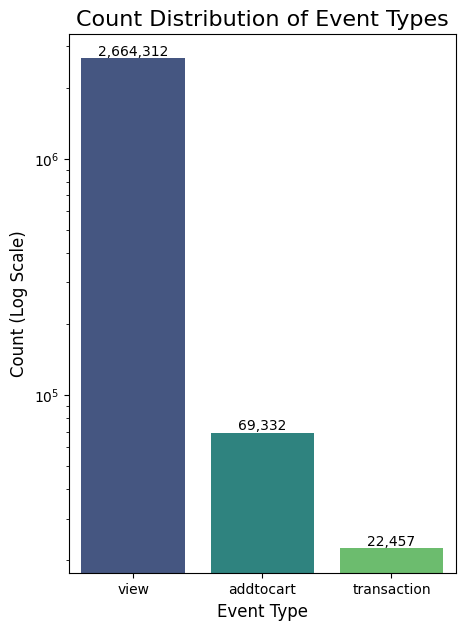

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming event_df is already defined and loaded
event_counts = event_df['event'].value_counts()

plt.figure(figsize=(5, 7)) 
sns.barplot(x=event_counts.index, y=event_counts.values,
            hue=event_counts.index,   # Assign x-variable to hue
            legend=False,             
            palette="viridis")

plt.title('Count Distribution of Event Types', fontsize=16)
plt.xlabel('Event Type', fontsize=12)
plt.ylabel('Count (Log Scale)', fontsize=12) # Chú thích rõ ràng đã dùng Log Scale

plt.yscale('log')

for i, count in enumerate(event_counts.values):
    plt.text(i, count, f'{count:,}', ha='center', va='bottom')

plt.show()

## 2. item_properties.csv

In [11]:
item_1_df=pd.read_csv('../dataset/item_properties_part1.csv')
item_1_df.head()
item_1_df

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513
...,...,...,...,...
10999994,1439694000000,86599,categoryid,618
10999995,1435460400000,153032,1066,n1020.000 424566
10999996,1440298800000,421788,888,35975 856003 37346
10999997,1437879600000,159792,400,n552.000 639502 n720.000 424566


In [12]:
item_1_df[item_1_df['property']=="categoryid"]

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
140,1432436400000,281245,categoryid,1277
151,1435460400000,35575,categoryid,1059
189,1437274800000,8313,categoryid,1147
197,1437879600000,55102,categoryid,47
...,...,...,...,...
10999880,1432436400000,441523,categoryid,1167
10999917,1433041200000,250848,categoryid,769
10999932,1438484400000,116380,categoryid,1509
10999960,1431226800000,84186,categoryid,209


In [13]:
item_1_df[item_1_df['property']=="available"]

,timestamp,itemid,property,value
5,1436065200000,285026,available,0
15,1437274800000,186518,available,0
79,1433646000000,423682,available,0
82,1434250800000,316253,available,1
96,1437274800000,430459,available,0
...,...,...,...,...
10999926,1431831600000,350051,available,0
10999933,1433646000000,358669,available,0
10999959,1442113200000,362293,available,1
10999986,1439089200000,259404,available,1


In [14]:
item_2_df=pd.read_csv('../dataset/item_properties_part2.csv')
item_2_df.head()

,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062


In [48]:
print(item_1_df.shape)
print(item_2_df.shape)
item_properties_df = pd.concat([item_1_df, item_2_df], axis=0)
print(item_properties_df.shape)

(10999999, 4)
(9275903, 4)
(20275902, 4)


In [20]:
category_rows = item_properties_df[item_properties_df['property'] == 'categoryid']
category_rows.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
140,1432436400000,281245,categoryid,1277
151,1435460400000,35575,categoryid,1059
189,1437274800000,8313,categoryid,1147
197,1437879600000,55102,categoryid,47


In [21]:
distinct_category_ids_list_1 = category_rows['value'].unique().tolist()
print(len(distinct_category_ids_list_1))

1242


## 3. category_tree 

In [ ]:
cat_df=pd.read_csv('../dataset/category_tree.csv')
cat_df.head()

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


In [22]:
distinct_category_ids_list_2 = cat_df['categoryid'].unique().tolist()
print(len(distinct_category_ids_list_2))

1669


In [23]:
distinct_parent_ids_list = cat_df['parentid'].unique().tolist()
print(len(distinct_parent_ids_list))

363


### Mỗi item có bao nhiêu property (propertyid)
* 1 property có thể theo n timestamp khác nhau -> tổng số property > nhiều so với distinct property của 1 item

In [24]:
item_properties_df[item_properties_df["itemid"]==1]

,timestamp,itemid,property,value
208308,1433041200000,1,296,866110
435957,1439694000000,1,59,769062
977089,1433041200000,1,813,814966
1765852,1433646000000,1,33,1128577 1000087 421694
1804484,1433646000000,1,790,n5760.000
...,...,...,...,...
8433656,1432436400000,1,917,n372361069212.000
8540586,1433646000000,1,1036,1154859
9116522,1432436400000,1,730,769062
9148098,1431226800000,1,6,1020281


In [25]:
item_property_count = (
    item_properties_df.groupby("itemid")["property"].nunique().reset_index(name="num_properties")
)
print(item_property_count.head())
item_property_count["num_properties"].value_counts().sort_index()

   itemid  num_properties
0       0              28
1       1              35
2       2              24
3       3              29
4       4              25


num_properties
12        9
13        2
14        1
15       39
16      186
17      625
18     2237
19     5958
20    10929
21    15154
22    21486
23    39177
24    32604
25    31872
26    29669
27    38121
28    28809
29    22553
30    22889
31    17781
32    17349
33    11199
34    10977
35     5671
36     1038
37      273
38      403
39      553
40     2573
41     7808
42     8585
43     1580
44     1282
45      418
46     3427
47     2216
48     2421
49     6185
50     8176
51     2827
52      991
53      454
54      368
55      137
56       40
59        1
Name: count, dtype: int64

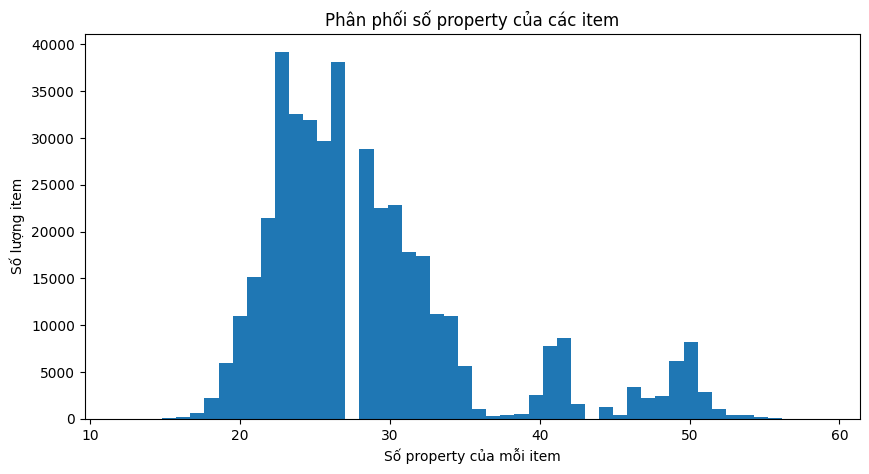

In [26]:
plt.figure(figsize=(10,5))
plt.hist(item_property_count["num_properties"], bins=50)
plt.xlabel("Số property của mỗi item")
plt.ylabel("Số lượng item")
plt.title("Phân phối số property của các item")
plt.show()

### Đếm số lần xuất hiện của mỗi property


In [27]:
def plot_top_properties(count_df, top_k=20, title="Top property phổ biến", quantity=True):
    """
    count_df: DataFrame có 2 cột 'property' và 'count'
    top_k: số property muốn vẽ
    title: tiêu đề biểu đồ
    """

    # Lấy top-k từ df đã có sẵn count
    top_df = count_df.head(top_k)

    plt.figure(figsize=(14, 6))
    plt.grid(axis="y", zorder=0)

    bars = plt.bar(top_df["property"], top_df["count"], zorder=2)

    # Ghi số lên mỗi cột
    if quantity == True:
        for bar in bars:
            height = bar.get_height()

            # format lại cho dễ đọc
            if height >= 1_000_000:
                label = f"{height/1_000_000:.1f}M"
            elif height >= 1_000:
                label = f"{height/1_000:.0f}K"
            else:
                label = str(height)

            plt.text(
                bar.get_x() + bar.get_width()/2,
                height,
                label,
                ha="center", va="bottom",
                fontsize=9
            )

    plt.title(title)
    plt.xlabel("Property")
    plt.ylabel("Số lần xuất hiện")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

* chưa lọc duplicate property trong 1 item

In [28]:
property_counts = (
    item_properties_df["property"].value_counts().reset_index()
)
property_counts.head(10)

,property,count
0,888,3000398
1,790,1790516
2,available,1503639
3,categoryid,788214
4,6,631471
5,283,597419
6,776,574220
7,678,481966
8,364,476486
9,202,448938


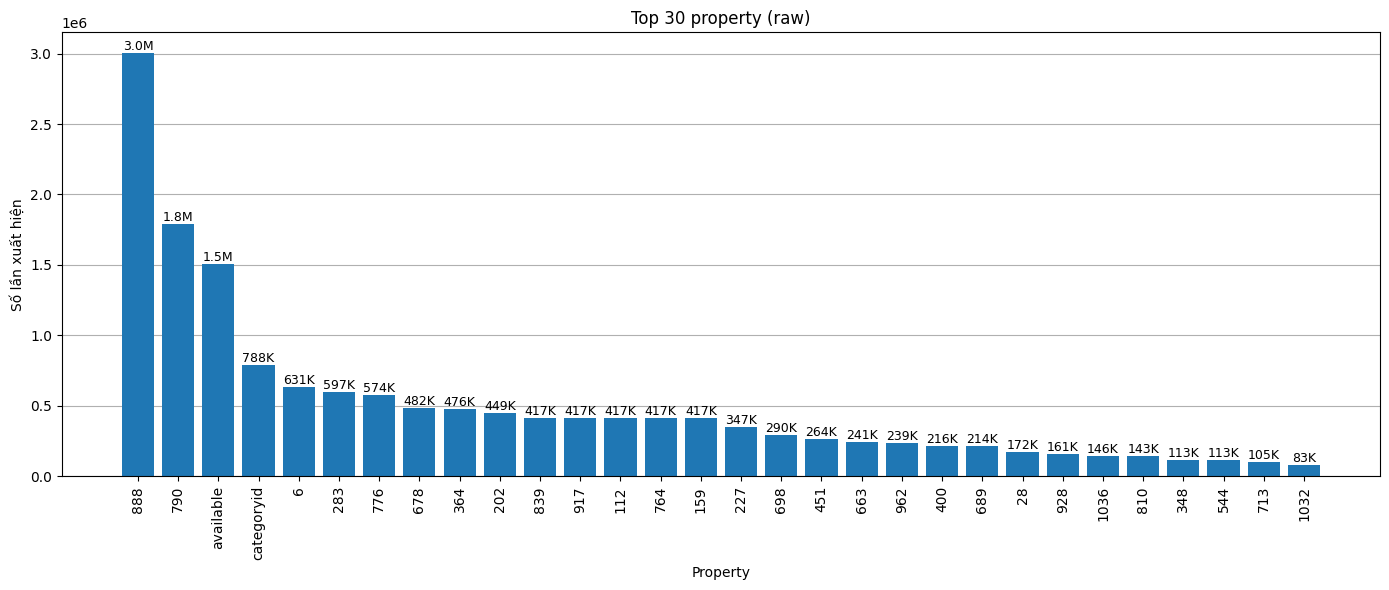

In [29]:
plot_top_properties(property_counts, top_k=30, title="Top 30 property (raw)")

* lọc property trùng trong 1 item 

In [30]:
# Giữ lại mỗi item một lần cho mỗi property
clean_property_df = item_properties_df.drop_duplicates(subset=["itemid", "property"])
print(clean_property_df.shape)
clean_property_df[clean_property_df["itemid"]==1].shape

(12003814, 4)


(35, 4)

In [31]:
property_clean_counts = (
    clean_property_df["property"]
    .value_counts()
    .reset_index()
)
property_clean_counts.head(10)

,property,count
0,790,417053
1,available,417053
2,categoryid,417053
3,159,417053
4,888,417053
5,283,417053
6,364,417053
7,112,417053
8,764,417053
9,678,417019


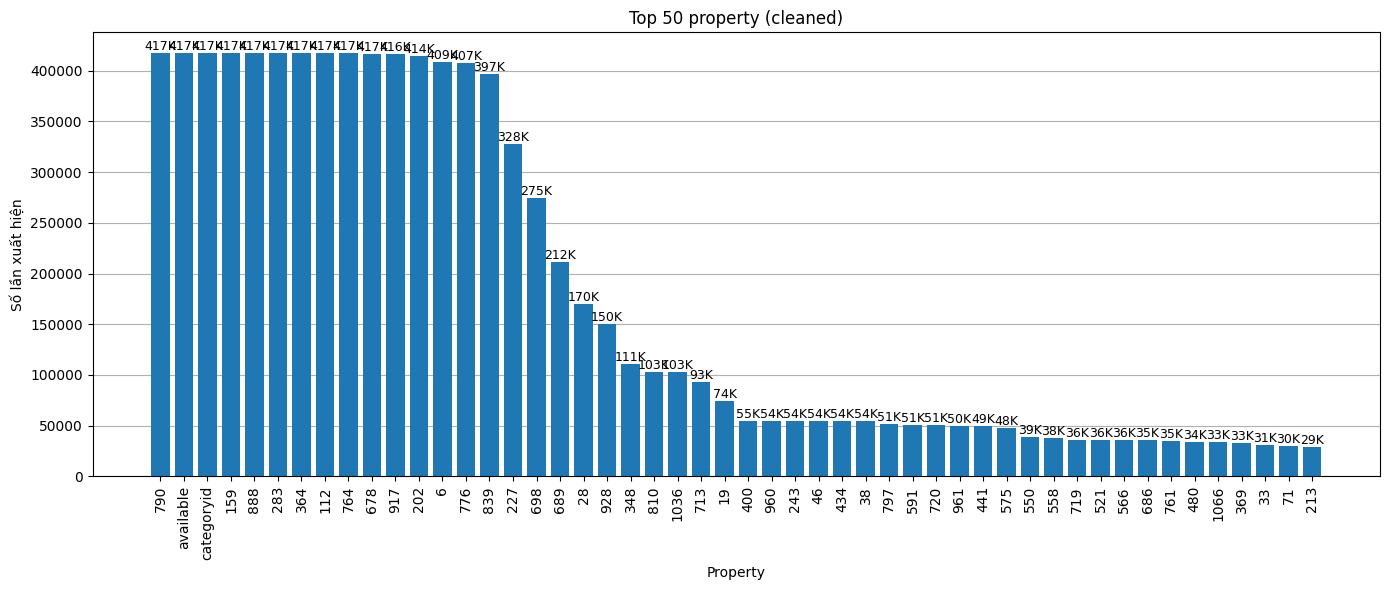

In [32]:
plot_top_properties(property_clean_counts, top_k=50, title="Top 50 property (cleaned)", quantity=True)

### Checking for 417053 times appear of property
* assumes that all items must have 3 most important property (available, categoryid and money)

In [40]:
item_properties_df[item_properties_df["property"]=="790"]

,timestamp,itemid,property,value
3,1431226800000,59481,790,n15360.000
14,1434250800000,169055,790,n21000.000
16,1435460400000,178601,790,n5400.000
42,1431831600000,125874,790,n39588.000
46,1433646000000,272201,790,n10320.000
...,...,...,...,...
9275853,1433646000000,436865,790,n0.000
9275861,1437274800000,241233,790,n12048.000
9275868,1433041200000,463381,790,n0.000
9275877,1436670000000,147935,790,n42720.000


#### 790 looks like money with 'n' for number (description from Kaggle)

In [41]:
item_properties_df[item_properties_df["property"]=="159"]

,timestamp,itemid,property,value
21,1431226800000,344365,159,519769
22,1434250800000,269797,159,519769
74,1433646000000,126522,159,519769
214,1433646000000,400399,159,519769
227,1431226800000,238394,159,519769
...,...,...,...,...
9275692,1431226800000,145587,159,519769
9275712,1433646000000,63812,159,519769
9275737,1431226800000,125537,159,519769
9275769,1431226800000,237643,159,519769


In [42]:
item_properties_df[item_properties_df["property"]=="888"]

,timestamp,itemid,property,value
1,1441508400000,206783,888,1116713 960601 n277.200
10,1439089200000,450113,888,1038400 45956 n504.000
17,1436670000000,319291,888,1292080
26,1435460400000,16615,888,150169 176547 824301 24474 293011 1240134
40,1433646000000,152892,888,599031
...,...,...,...,...
9275876,1439694000000,4849,888,297765 406279 907471 88645 279913 1223352 1318567
9275881,1431226800000,123846,888,72895
9275889,1434250800000,12864,888,249879 724834 1172269
9275895,1435460400000,356920,888,5135 1233825


In [43]:
item_properties_df[item_properties_df["property"]=="283"]

,timestamp,itemid,property,value
158,1434250800000,244145,283,132734 242183 797785
175,1437274800000,38494,283,1319279 920988 639039
309,1435460400000,55929,283,554317 820477 938947
334,1432436400000,439782,283,882006 768453 1113872 1230005
338,1431226800000,298072,283,341599 912235 363182 695707 479886 341599 9122...
...,...,...,...,...
9275765,1433041200000,16164,283,971154 292676 1318713 864089 215470 n13872.000
9275782,1433646000000,254983,283,305351 322391 1120576 114320 221130
9275805,1435460400000,433507,283,188678 1128577 227976 309875 486553 n48.000 31...
9275830,1435460400000,124798,283,598729 511183 981281 829153 631983


In [44]:
item_properties_df[item_properties_df["property"]=="364"]

,timestamp,itemid,property,value
73,1431226800000,206605,364,486220
100,1434250800000,403192,364,256913
134,1442113200000,182237,364,956209
178,1433041200000,82179,364,618754
230,1431226800000,179634,364,927963
...,...,...,...,...
9275534,1431226800000,441641,364,378163
9275553,1435460400000,224857,364,1307969
9275567,1431226800000,443716,364,316764
9275730,1435460400000,153544,364,369357


In [45]:
item_properties_df[item_properties_df["property"]=="112"]

,timestamp,itemid,property,value
41,1431831600000,301185,112,679677
53,1431831600000,330306,112,679677
184,1431831600000,177440,112,679677
199,1431226800000,387461,112,679677
298,1433646000000,452566,112,679677
...,...,...,...,...
9275746,1433041200000,48460,112,679677
9275778,1431226800000,391559,112,679677
9275826,1433041200000,312011,112,679677
9275882,1433041200000,167555,112,679677


In [46]:
item_properties_df[item_properties_df["property"]=="764"]

,timestamp,itemid,property,value
31,1431831600000,246186,764,1285872
67,1431831600000,462976,764,1285872
308,1431226800000,244384,764,1285872
355,1431226800000,427697,764,1285872
382,1435460400000,298812,764,1285872
...,...,...,...,...
9275596,1431226800000,211660,764,1285872
9275606,1435460400000,130689,764,1285872
9275612,1431226800000,140096,764,1285872
9275729,1435460400000,87022,764,1285872
